Logistic regression, using scikit-learn and statsmodels (based on introduction to statistical learning)

In [47]:
import numpy as np 
import pandas as pd
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
import seaborn as sns

In [43]:
#load datasets
large = pd.read_csv('../datasets/full_cleaned_dataset.csv')
small = pd.read_csv('../datasets/1std_dataset.csv')

In [44]:
#dropping the z_score column, so that small is a subset of large
small.drop(columns=['z_score'], inplace=True)

generalAndAdministrativeExpenses              generalAndAdministrativeExpenses                   1.000000
epsdiluted                                    eps                                                1.000000
operatingCashFlow                             netCashProvidedByOperatingActivities               0.999971
incomeBeforeTaxRatio                          netIncomeRatio_income_statement                    0.999929
totalAssets                                   totalLiabilitiesAndTotalEquity                     0.999873
incomeBeforeTaxRatio                          operatingIncomeRatio                               0.999154
totalStockholdersEquity                       totalEquity                                        0.999015
operatingIncomeRatio                          netIncomeRatio_income_statement                    0.998601
netIncome_income_statement                    netIncome_cash_flow_statement                      0.997294
netIncome_cash_flow_statement                 

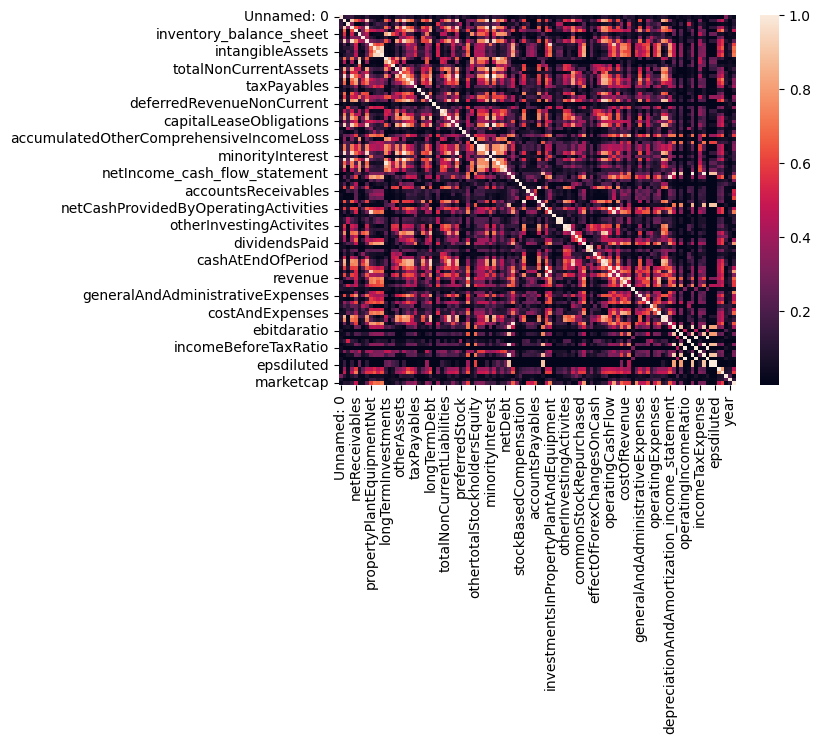

In [45]:
#lets figureout the biggest correlations between the features
x = large.corr(numeric_only=True).abs()

y = x.unstack().sort_values(ascending=False).drop_duplicates()

sns.heatmap(x)
print(y.head(25))

In [50]:
# logistic regression
mapper = DataFrameMapper([(small.select_dtypes(include=np.number).columns, StandardScaler())])
X = mapper.fit_transform(small.copy())
y = small['distressed']
glm = sm.GLM(y, X, family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

c:\Users\bicic\Documents\bachelor\.venv\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


                 Generalized Linear Model Regression Results                  
Dep. Variable:             distressed   No. Observations:                  667
Model:                            GLM   Df Residuals:                      564
Model Family:                Binomial   Df Model:                          102
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.4333e-09
Date:                Fri, 04 Apr 2025   Deviance:                   4.8667e-09
Time:                        13:24:05   Pearson chi2:                 2.43e-09
No. Iterations:                    27   Pseudo R-squ. (CS):             0.1219
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0004   1.56e+04  -2.56e-08      1.0